In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
% matplotlib inline
import pickle
from IPython.display import display

In [2]:
r = pickle.load(open('allData.text'))
# pp.pprint(r)
df = pd.DataFrame.from_dict(r)
display(df)

,acceptedAnswerId,acceptedAnswerScore,averageLengthOfCodeSnippet,englishNumChars,englishNumWords,numQuestionMarks,numberImages,numberLinks,numberOfCodeSnippets,totalLinesOfCode,viewCount
0,231855,9581,6.500000,413,71,7,0,1,2,13,1293577
1,100146,1433,0.000000,48,8,2,0,0,0,0,480945
2,394814,3717,0.000000,120,18,1,0,0,0,0,910055
3,419185,3041,13.000000,20,4,1,0,0,1,13,1116079
4,89243,2595,0.000000,129,24,1,0,0,0,0,1912761
5,26853961,1904,7.000000,361,63,1,0,0,1,7,788978
6,613218,2666,0.000000,444,86,1,0,1,0,0,1294243
7,273227,2496,7.500000,313,56,2,0,0,2,15,1245162
8,739665,2453,2.500000,223,36,1,0,0,2,5,383769
9,423596,2780,0.000000,195,35,2,0,0,0,0,1999493


In [3]:
def quickplot(df, x, y):
    plt.plot(df[x], df[y], '*')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()
    
def dividedByMax(df, col_name):
    dbm_col_name = col_name + 'DividedByMax'
    df[dbm_col_name] = df[col_name].div(df[col_name].max())
    return df

def normalize(df, col_name):
    normalized_col_name = col_name + 'Normalized'
    df[normalized_col_name] = (df[col_name] - df[col_name].mean()) / (df[col_name].max() - df[col_name].min())
    return df

def dividedByViewCount(df, col_name):
    dvc_col_name = col_name + 'DividedByViewCount'
    df[dvc_col_name] = df[col_name].div(df['viewCount'])
    return df

In [4]:
### Normalized dataframe columns
# df = normalize(df, 'totalLinesOfCode')
# df = dividedByMax(df, 'acceptedAnswerScore')
# df = normalize(df, 'acceptedAnswerScore')

df = dividedByViewCount(df, 'acceptedAnswerScore')
display(df.head())

,acceptedAnswerId,acceptedAnswerScore,averageLengthOfCodeSnippet,englishNumChars,englishNumWords,numQuestionMarks,numberImages,numberLinks,numberOfCodeSnippets,totalLinesOfCode,viewCount,acceptedAnswerScoreDividedByViewCount
0,231855,9581,6.5,413,71,7,0,1,2,13,1293577,0.007407
1,100146,1433,0.0,48,8,2,0,0,0,0,480945,0.002980
2,394814,3717,0.0,120,18,1,0,0,0,0,910055,0.004084
3,419185,3041,13.0,20,4,1,0,0,1,13,1116079,0.002725
4,89243,2595,0.0,129,24,1,0,0,0,0,1912761,0.001357


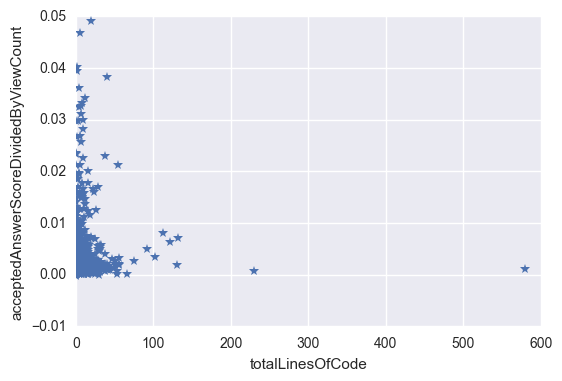

In [5]:
quickplot(df, 'totalLinesOfCode', 'acceptedAnswerScoreDividedByViewCount')

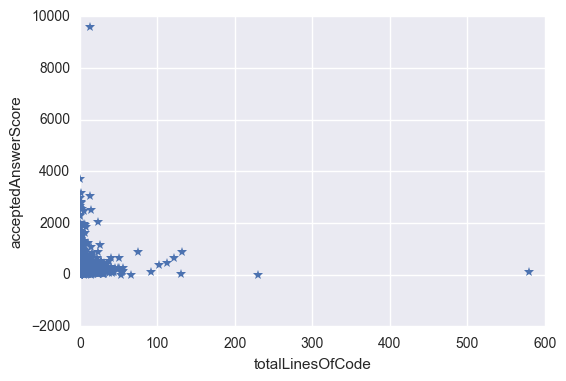

In [6]:
quickplot(df, 'totalLinesOfCode', 'acceptedAnswerScore')

le comments:
- Questions that are popular seem to have fewer lines of code (most seem to have under 20, see the dense "cluster" of points).

Process stuff:
- Does the plot look different without the dividing by view count?
- Let's take a closer look at the 0 to 20 lines of code region...

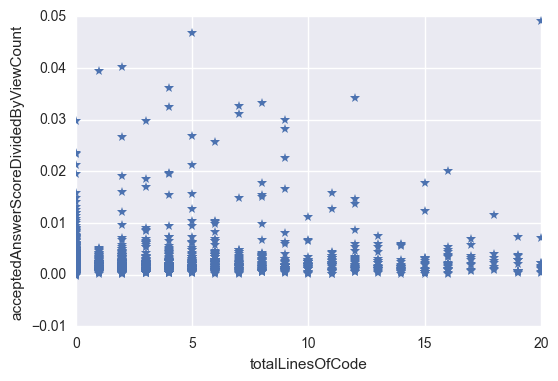

In [7]:
plt.plot(df['totalLinesOfCode'], df['acceptedAnswerScoreDividedByViewCount'], '*')
plt.xlabel('totalLinesOfCode')
plt.ylabel('acceptedAnswerScoreDividedByViewCount')
axes = plt.gca()
axes.set_xlim([0, 20])
plt.show()

^ Ok that wasn't as exciting as we thought it'd be. Stick with the entire plot.

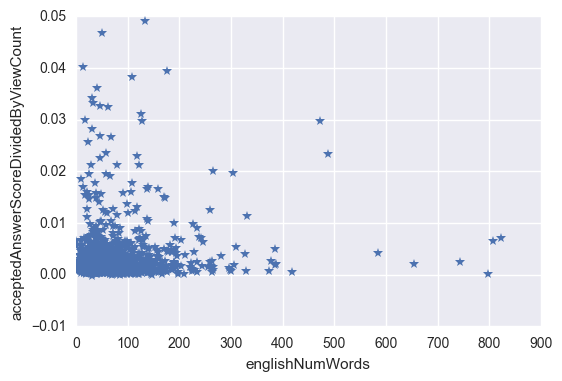

In [8]:
quickplot(df, 'englishNumWords', 'acceptedAnswerScoreDividedByViewCount')

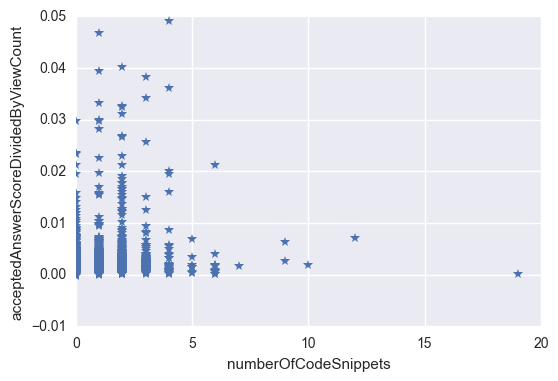

In [9]:
quickplot(df, 'numberOfCodeSnippets', 'acceptedAnswerScoreDividedByViewCount')